In [1]:
import numpy as np
import random
from value_function_utils import visualize_grid_action_values
from envs.gridworldv2 import GridworldV2Env

In [2]:
# initialize environment 
env = GridworldV2Env()

# initialize hyperparameters
max_episode = 4000
gamma = 0.99
alpha = 0.01



In [3]:
grid_action_values = np.zeros((len(env.distinct_states), env.action_space.n))
grid_action_values[env.goal_state] = 1
grid_action_values[env.bomb_state] = -1 

In [4]:
# initialize q table 
q = grid_action_values
q

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [5]:
env.action_space.n

4

In [6]:
# Policy (epsilon-greedy policy)
def greedy_policy(q_vals ,epsilon=0.1):
    """Epsilon-greedy policy"""

    if random.random() >= epsilon:
        return np.argmax(q_vals)
    else: 
        return random.randint(0, env.action_space.n - 1)

def decay_epsilon(epsilon):
    max_eps = 1 
    min_eps = 0.01
    if epsilon > max_eps:
        epsilon = max_eps
        return epsilon 
    elif (epsilon <= max_eps) & (epsilon > min_eps):
        epsilon = (0.99) * epsilon
        return epsilon 
    else: 
        return min_eps

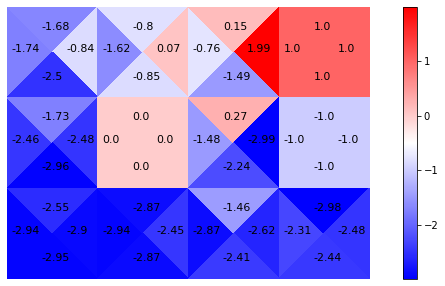

In [7]:
# iterate with episodes 
np.random.seed(42)

for episode in range(max_episode):
    step_num = 1
    done = False 
    state = env.reset()
    action = greedy_policy(q[state], 1)
    epsilon = 1

    while not done:
        
        next_state, reward, done = env.step(action)
        epsilon = decay_epsilon(epsilon)
        next_action = greedy_policy(q[next_state], epsilon=epsilon)
        q[state][action] += alpha * (reward + gamma * q[next_state][next_action] - q[state][action])
        state = next_state
        action = next_action

visualize_grid_action_values(grid_action_values=q)



In [8]:
np.arange(4)

array([0, 1, 2, 3])

In [9]:
np.random.choice(np.arange(4))

2